In [3]:
# Import necessary libraries and functions from quantitative_analysis.py
import sys
import os
sys.path.append(os.path.abspath('../src'))  # Add src directory to path
from quantitative_analysis import load_stock_data, calculate_technical_indicators, calculate_financial_metrics, visualize_data
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# Define the stock symbols (focused dataset)
stocks = ['AAPL', 'AMZN', 'GOOG', 'META']

# Define the project root directory
project_root = os.path.abspath('..')  # Parent of notebooks/
data_dir = os.path.join(project_root, 'Data', 'yfinance_data')

In [4]:
import yfinance as yf

# Define all stocks needed for both quantitative_analysis.py and financial_eda.py
all_stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

# Create the data directory if it doesn't exist
os.makedirs(data_dir, exist_ok=True)

# Download data for each stock and save to the correct directory
for stock in all_stocks:
    df = yf.download(stock, start='2020-01-01', end='2025-06-04')
    file_path = os.path.join(data_dir, f'{stock}_historical_data.csv')
    df.to_csv(file_path)
    print(f"Downloaded and saved data for {stock} to {file_path}")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Downloaded and saved data for AAPL to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\AAPL_historical_data.csv


[*********************100%***********************]  1 of 1 completed


Downloaded and saved data for AMZN to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\AMZN_historical_data.csv


[*********************100%***********************]  1 of 1 completed


Downloaded and saved data for GOOG to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\GOOG_historical_data.csv


[*********************100%***********************]  1 of 1 completed


Downloaded and saved data for META to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\META_historical_data.csv


[*********************100%***********************]  1 of 1 completed


Downloaded and saved data for MSFT to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\MSFT_historical_data.csv


[*********************100%***********************]  1 of 1 completed


Downloaded and saved data for NVDA to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\NVDA_historical_data.csv


[*********************100%***********************]  1 of 1 completed

Downloaded and saved data for TSLA to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\TSLA_historical_data.csv


In [5]:
for stock in all_stocks:
    df = yf.download(stock, start='2020-01-01', end='2025-06-04')
    df.reset_index(inplace=True)  # ← This line fixes the issue
    file_path = os.path.join(data_dir, f'{stock}_historical_data.csv')
    df.to_csv(file_path, index=False)
    print(f"Downloaded and saved data for {stock} to {file_path}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Downloaded and saved data for AAPL to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\AAPL_historical_data.csv
Downloaded and saved data for AMZN to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\AMZN_historical_data.csv
Downloaded and saved data for GOOG to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\GOOG_historical_data.csv



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Downloaded and saved data for META to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\META_historical_data.csv
Downloaded and saved data for MSFT to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\MSFT_historical_data.csv
Downloaded and saved data for NVDA to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\NVDA_historical_data.csv
Downloaded and saved data for TSLA to c:\Users\Senayit\Documents\1\week1\nova-financial-challenge-week1\Data\yfinance_data\TSLA_historical_data.csv


In [6]:
# Load stock data
stock_data = load_stock_data(data_dir)

In [7]:
# Calculate technical indicators
stock_data = calculate_technical_indicators(stock_data)

Technical indicators calculated for selected stocks.


In [8]:
# Calculate financial metrics
metrics_df = calculate_financial_metrics(stock_data)

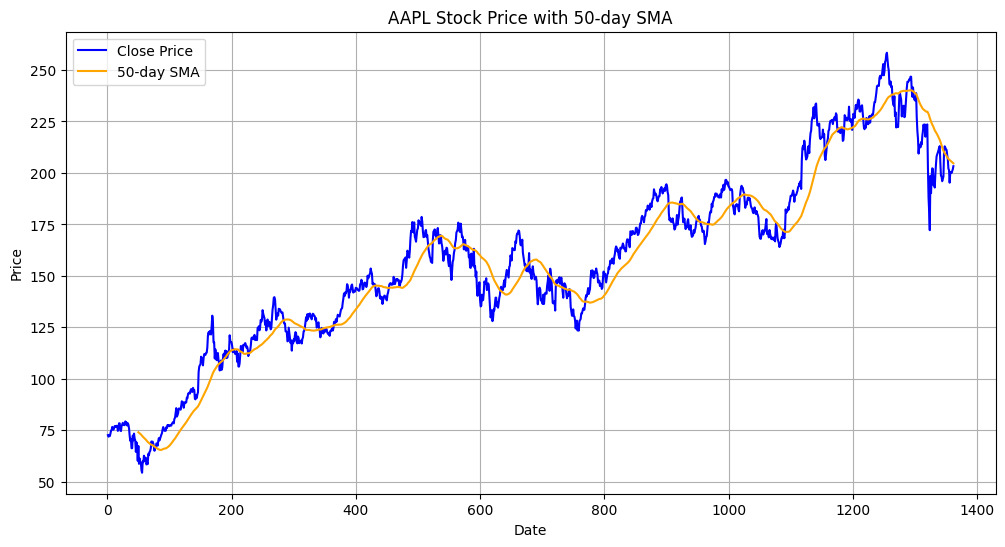

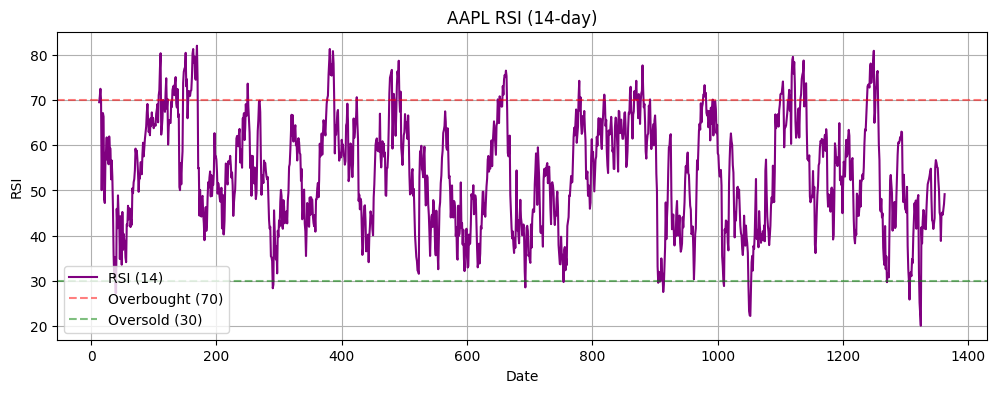

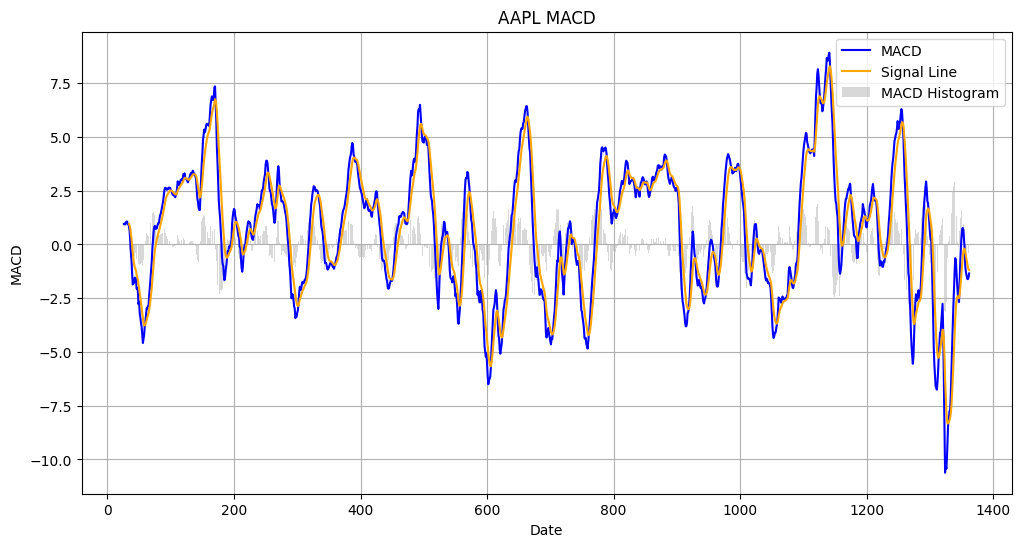

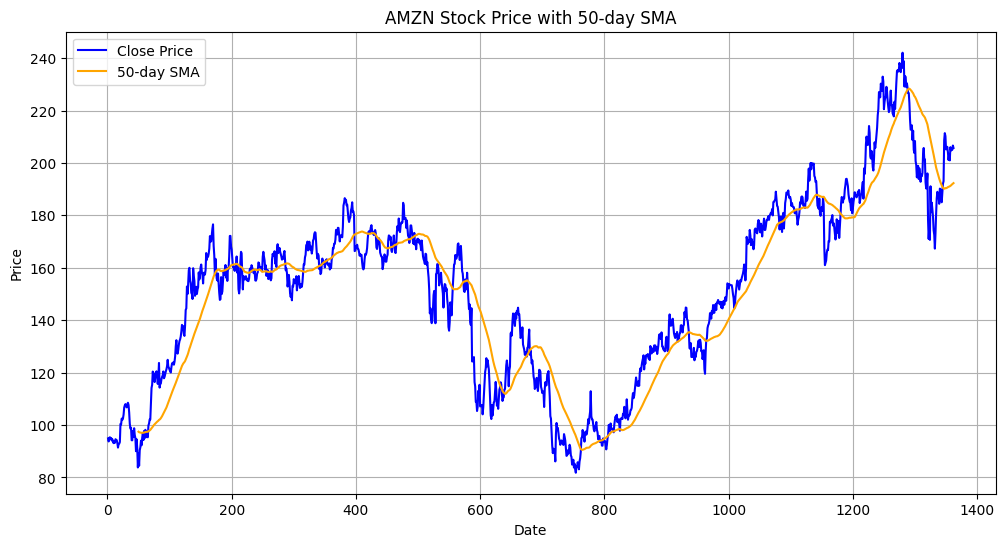

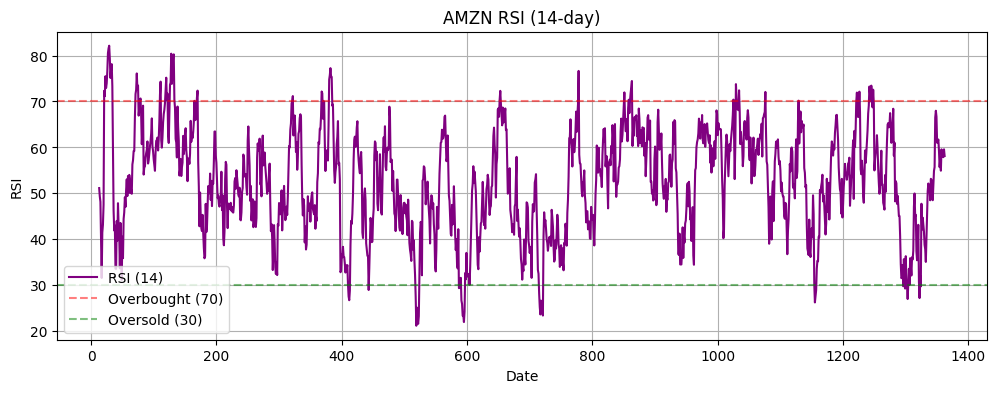

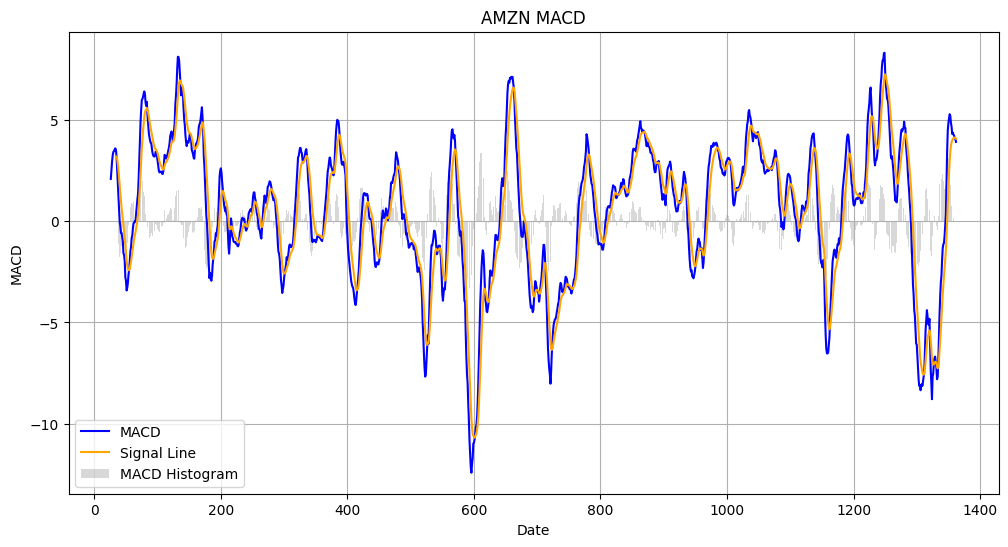

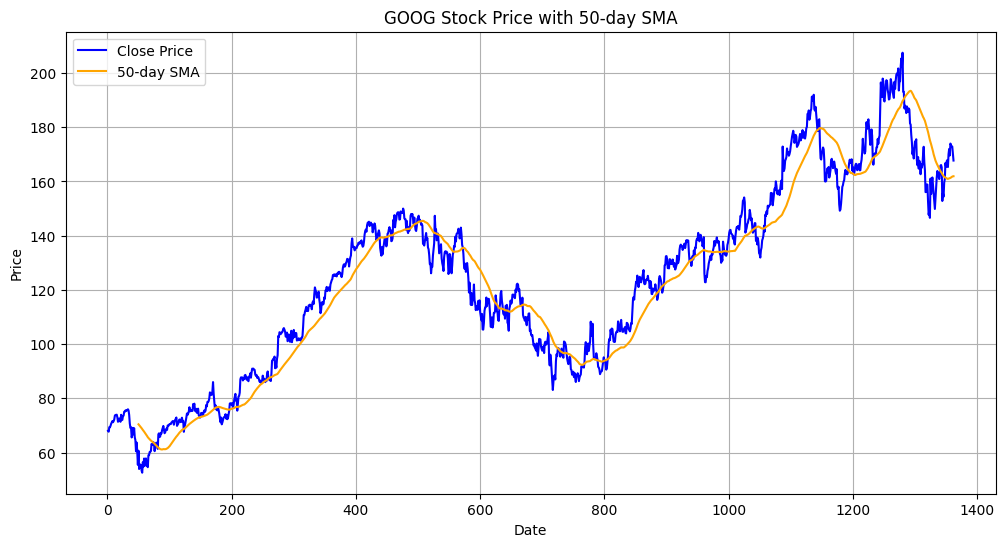

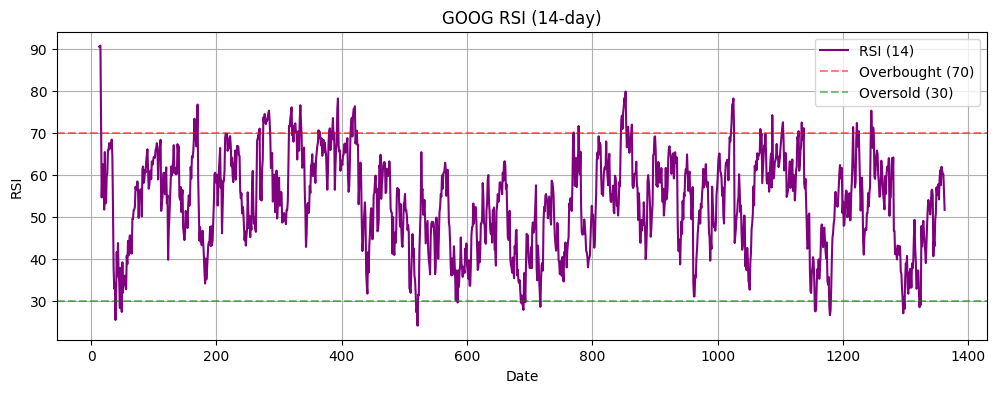

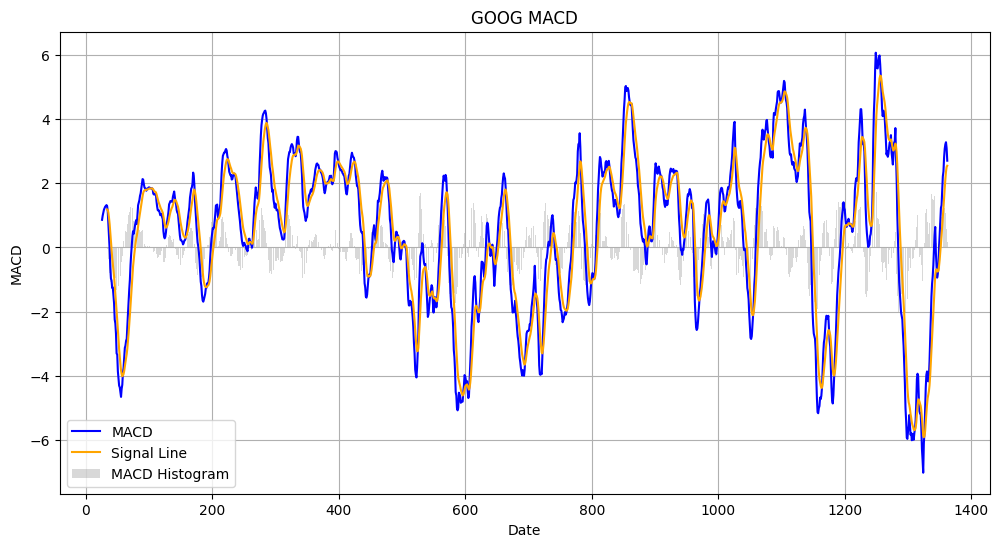

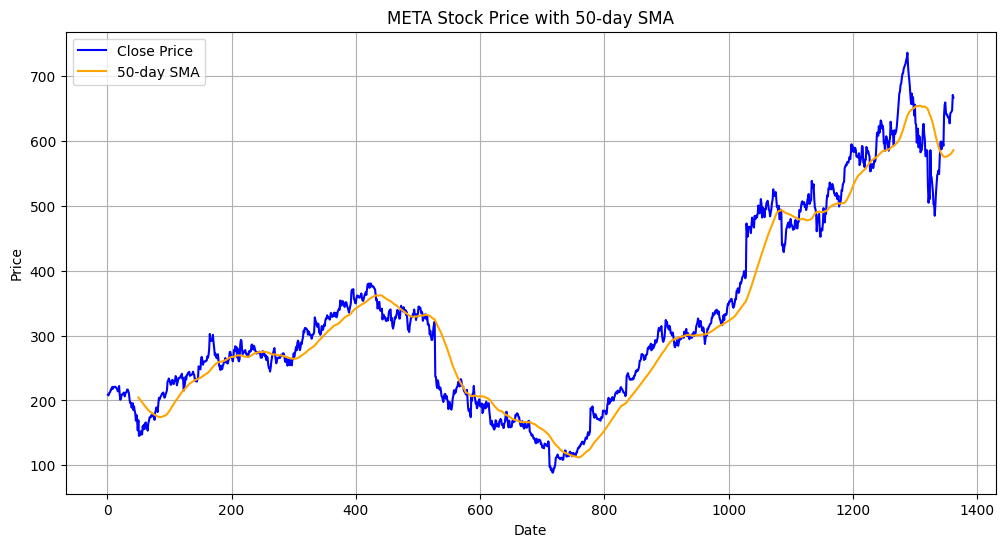

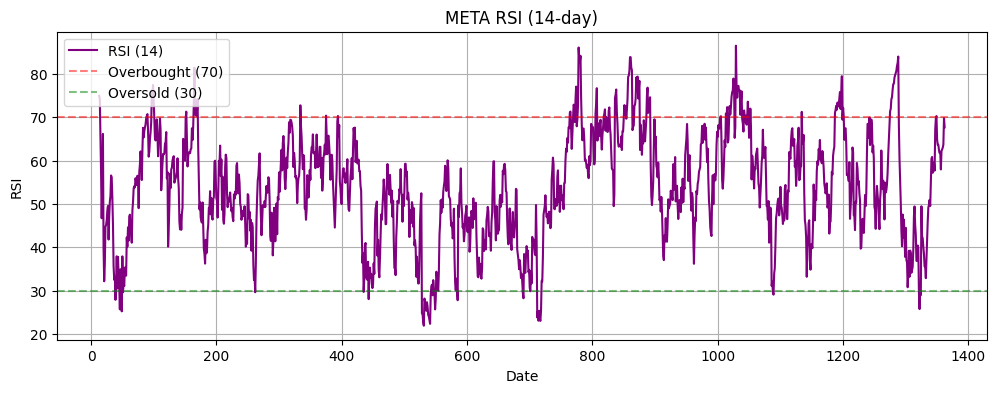

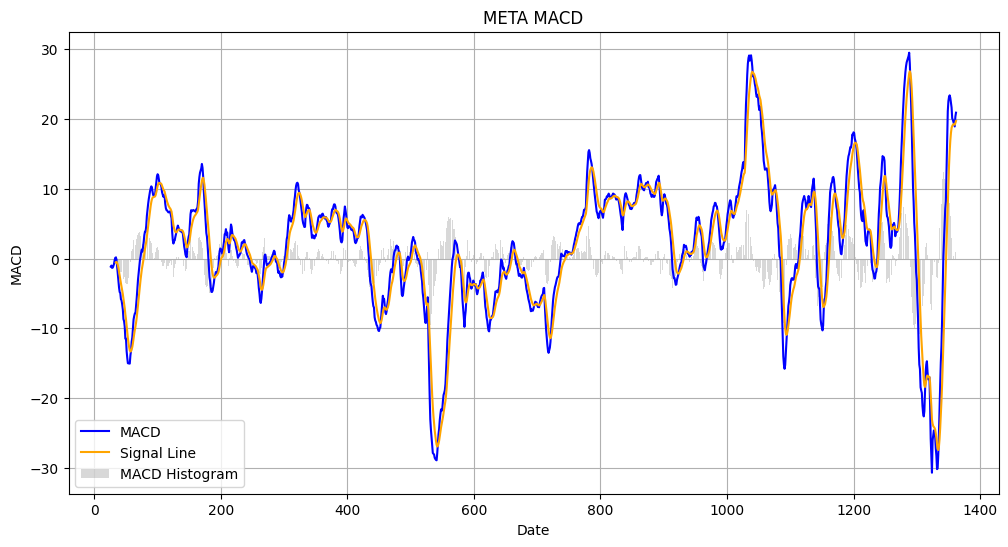

Visualizations for AAPL, AMZN, GOOG, META saved in figures/


In [9]:
# Visualize the data and display plots inline
output_dir = 'figures/'  # Saves to notebooks/figures/
os.makedirs(output_dir, exist_ok=True)
for stock in stocks:
    df = stock_data[stock]
    
    # Plot 1: Stock Price with SMA
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.plot(df.index, df['SMA_50'], label='50-day SMA', color='orange')
    plt.title(f'{stock} Stock Price with 50-day SMA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(output_dir, f'{stock}_price_sma.png'))
    plt.show()
    plt.close()
    
    # Plot 2: RSI
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df['RSI_14'], label='RSI (14)', color='purple')
    plt.axhline(70, linestyle='--', color='red', alpha=0.5, label='Overbought (70)')
    plt.axhline(30, linestyle='--', color='green', alpha=0.5, label='Oversold (30)')
    plt.title(f'{stock} RSI (14-day)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(output_dir, f'{stock}_rsi.png'))
    plt.show()
    plt.close()
    
    # Plot 3: MACD
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['MACD'], label='MACD', color='blue')
    plt.plot(df.index, df['MACD_Signal'], label='Signal Line', color='orange')
    plt.bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.3)
    plt.title(f'{stock} MACD')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(output_dir, f'{stock}_macd.png'))
    plt.show()
    plt.close()

print(f"Visualizations for AAPL, AMZN, GOOG, META saved in {output_dir}")